In [17]:
# import libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [19]:
# Download last 1 year of data
stock_symbol = "AAPL"
data = yf.download(stock_symbol, period="1y", )

print(data.head())

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-08-09  215.233429  215.770909  210.983301  211.112701  42201600
2024-08-12  216.768036  218.741096  214.844804  215.313158  38028100
2024-08-13  220.494934  221.112757  218.242841  218.242841  44155300
2024-08-14  220.943359  222.248768  218.930431  219.797394  41960600
2024-08-15  223.932846  224.560644  221.979705  223.813271  46414000


In [7]:
# Shift 'Close' by -1 to get the NEXT day's closing price
data['Target'] = data['Close'].shift(-1)

# Drop the last row (NaN target)
data = data.dropna()

# Features and Target
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Target']

In [11]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [13]:
# Train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [21]:
# Evaluate the model
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression RMSE: 3.420357686689612


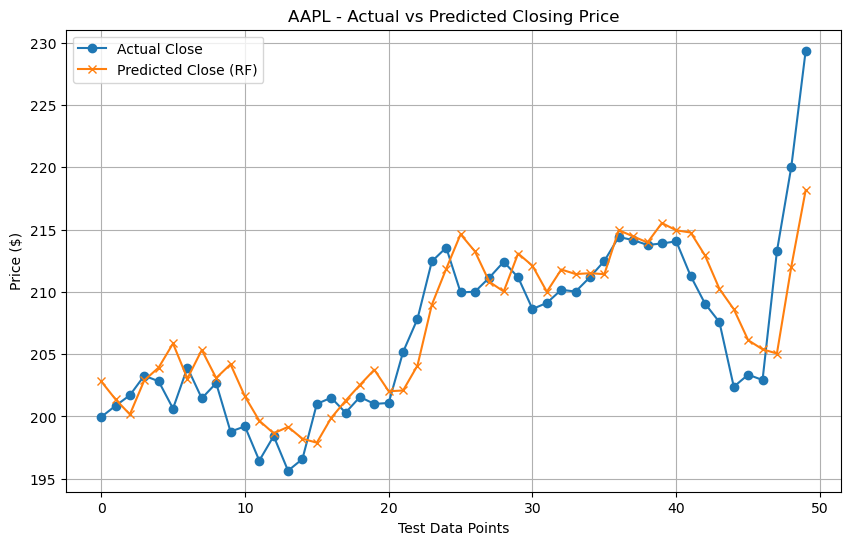

In [25]:
# Plot acual vs predicted
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual Close', marker='o')
plt.plot(y_pred_lr, label='Predicted Close (RF)', marker='x')
plt.title(f"{stock_symbol} - Actual vs Predicted Closing Price")
plt.xlabel("Test Data Points")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# Next day prediction
latest_data = data[['Open', 'High', 'Low', 'Volume']].iloc[-1].values.reshape(1, -1)
next_day_price = lr_model.predict(latest_data)
print(f"Predicted next day's closing price for {stock_symbol}: ${next_day_price[0]:.2f}")

Predicted next day's closing price for AAPL: $225.76
